In [ ]:
## By default = threshold value used in Logistic Regression = 0.5
## But this value can change when we work in different domain ( domain expertise )

In [3]:
# roc curce and auc score - helps us to choose suitable threshold value

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
## generate 2 class dataset
X,y=make_classification(n_samples=1000,n_classes=2, random_state=1)

In [4]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [5]:
## generate a no skill prediction ( majority class)
## this will always give probability of any test data as 0 for all y_test

## this dummy model we will compare with our prediction model

dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [9]:
## prediction based on probability
model_prob=model.predict_proba(X_test)

In [10]:
## focussing on 1 outcome = positive outcome
model_prob=model_prob[:,1]

In [11]:
## lets calculate the scores of  dummy model which had 0 probability and logistic regression model
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [ ]:
## ROC curve - give us FPR ( False positive rate ) with N= number of negatives

# FP/N = FP / ( FP + TN )

# TPR ( True postive rate )= TP/P = TP/(TP+FN) = 1-FNR where FNR - false negative rate 

# if we plot FNR on x axis and TPR on y axis - we get ROC curve

In [13]:
## calculate ROC curves
dummy_fpr,dummy_tpr, _ =roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,_=roc_curve(y_test,model_prob)

In [14]:
model_fpr,model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

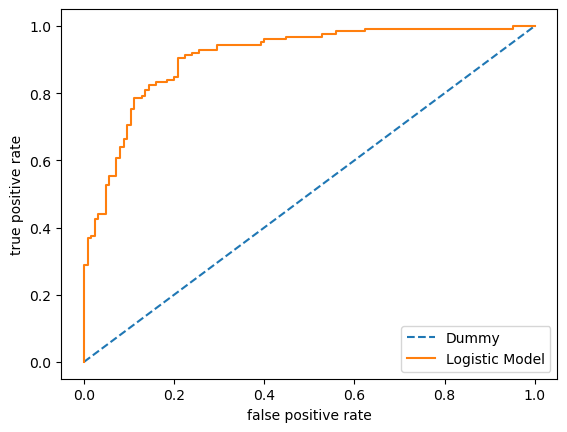

In [16]:
## plot curve
pyplot.plot(dummy_fpr,dummy_tpr, linestyle='--', label='Dummy')
pyplot.plot(model_fpr,model_tpr, linestyle='-', label='Logistic Model')

# axis labels
pyplot.xlabel('false positive rate')
pyplot.ylabel('true positive rate')

# show the legend
pyplot.legend()
pyplot.show()


In [ ]:
## area under logistic regression curve > area under dummy model - so logistic regression performs better here
## AUC ( logistic ) > AUC ( dummy )

In [ ]:
## getting thresholds


In [17]:
## calculate ROC curves- third param in computing the curve
dummy_fpr,dummy_tpr, _ =roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,thresholds=roc_curve(y_test,model_prob)

In [18]:
thresholds

array([           inf, 9.99410789e-01, 9.48821704e-01, 9.45822838e-01,
       9.35475968e-01, 9.33992424e-01, 9.28149306e-01, 9.26128400e-01,
       9.09612674e-01, 9.01641419e-01, 8.98006100e-01, 8.87888976e-01,
       8.55067260e-01, 8.50088690e-01, 8.45815476e-01, 8.32456357e-01,
       8.19802513e-01, 8.15795432e-01, 8.07773360e-01, 8.01684721e-01,
       7.72666184e-01, 7.71984305e-01, 7.18090773e-01, 7.16353949e-01,
       6.61932009e-01, 6.29054005e-01, 6.17692223e-01, 6.09937071e-01,
       5.95782185e-01, 5.88259352e-01, 5.69445881e-01, 5.42763147e-01,
       5.28902010e-01, 5.13580364e-01, 5.10710770e-01, 4.87563605e-01,
       4.84614874e-01, 4.55642609e-01, 4.46920501e-01, 4.25852373e-01,
       3.64309105e-01, 3.56487638e-01, 3.45966312e-01, 3.07821013e-01,
       3.00875411e-01, 2.85434309e-01, 2.84734466e-01, 2.18608803e-01,
       1.96799778e-01, 1.34064894e-01, 1.33282726e-01, 1.30277048e-01,
       1.26943039e-01, 1.04666641e-01, 1.04124073e-01, 7.03330148e-02,
      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


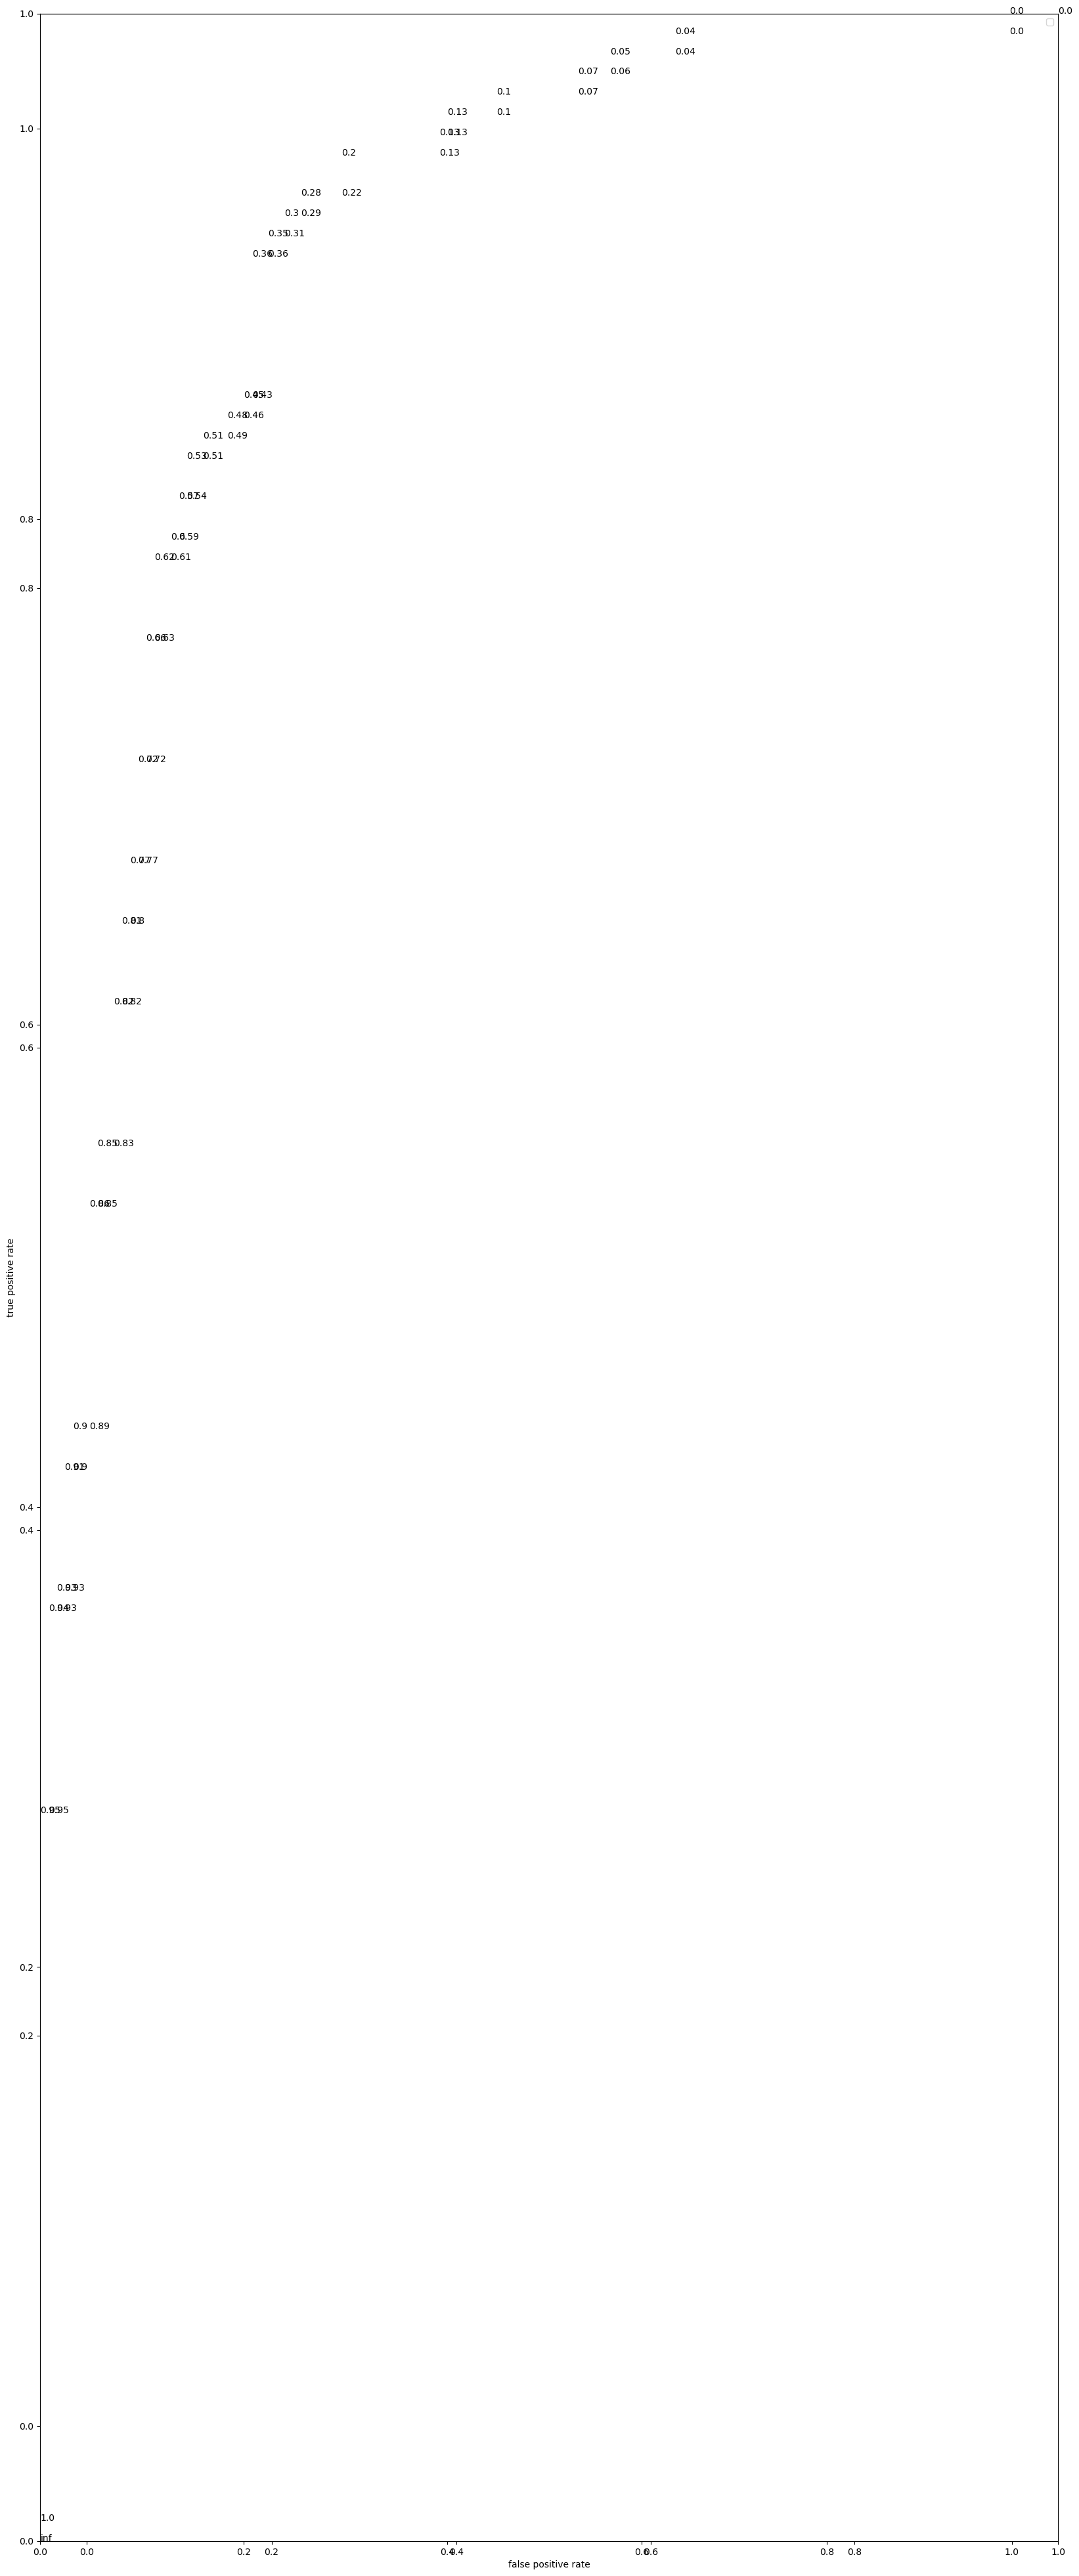

In [19]:
## plot curve
## get threshold on each minima point of curve

import numpy as np
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr,dummy_tpr, linestyle='--', label='Dummy')
pyplot.plot(model_fpr,model_tpr, linestyle='-', label='Logistic Model')
ax=fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
pyplot.xlabel('false positive rate')
pyplot.ylabel('true positive rate')

# show the legend
pyplot.legend()
pyplot.show()


In [ ]:
## to choose correct threshold out of all;
## if domain expert says - we  need a really good TPR , but FPR less so we will take = 0.620.61 

